## 11.1 Description

A MAC is a small bit of information that can be used to check the authenticity and the integrity of a message. These codes are often called “tags”. A MAC algorithm takes a **message** of arbitrary length and a secret **key** of fixed length, and produces the **tag**.

### Secure MACs

An attacker will then attempt to produce an *existential forgery*, a fancy way of saying that they will produce some new valid combination of $(m, t)$. We will also consider the MAC insecure if an attacker can compute a new, different valid tag $t'$ for a message $m_i$ that we previously gave them a valid tag for.

### Why does a MAC take a secret key?

You have some tarballs with source code in them, and maybe some binary packages for popular operating systems. Then you put some (cryptographically secure!) hashes right next to them, so that anyone who downloads them can verify the hashes and be confident that they downloaded what they think they downloaded.

Computing those hashes is something everyone can do. You're even relying on that fact for your user to be able to verify their download. That also means that an attacker that modified any of the downloads can just compute the hash again for the modified download and save that value.

> if no the secret key, the tag anybody can do, so it is no authenticate. But other issue is how to transmit the correct secret key.

### 11.2 Combining MAC and message

There are three common ways to combine a ciphertext with a MAC.
1. Authenticate and encrypt. This is how **SSH** does it. In symbols: $C = E(K_C, P)$, $t = MAC(K_M, P)$, and you send both ciphertext $C$ and tag $t$.
2. Authenticate, then encrypt. This is how **TLS** usually does it. In symbols: $t = MAC(K_M, P)$, $C = E(K_C, P∥t)$, and you only send $C$.
3. Encrypt, then authenticate. This is how **IPSec** does it. In symbols: $C = E(K_C, P)$, $t = MAC(K_M,C)$, and you send both $C$ and $t$.


We now know that out of all of these, encrypt-then-authenticate is unequivocally the best option.

### Authenticate-then-encrypt

Authenticate-then-encrypt is a poor choice, but it's a subtle poor choice. It can still be provably secure, but only under certain conditions.

### Authenticate-and-encrypt


Authenticate-and-encrypt has some serious problems. Since the tag authenticates the plaintext and that tag is part of the transmitted message, an attacker will be able to recognize two plaintext messages are the same because their tags will also be the same.

## 11.3 A naive attempt with hash functions

Perhaps one of the simplest ways you could imagine doing that is to just prefix the message with the secret key and hash the whole thing:
$$t = H(k∥m)$$
This scheme is most commonly called “Prefix-MAC”, because it is a MAC algorithm that works by using the secret key as a prefix.

### Breaking prefix-MAC

As we saw in the chapter on hash functions, many hash functions, such as MD5, SHA-0, SHA-1 and SHA-2, pad the message with a *predictable padding* before producing the output digest. The output digest is the same thing as the internal state of the hash function. That's a problem: the attacker can use those properties to forge messages.

That state matches the state you get when you hash $k∥m∥p$, where $k$ is the secret key, $m$ is the message, and $p$ is that predictable padding. Now, the attacker gets the hash function to consume some new bytes: the attacker's chosen message $m'$. The internal state of the hash function is now what you get when you feed it $k∥m∥p∥m'$. Then, the attacker tells the hash function to produce a digest. Again, the hash function appends a padding, so we're now at $k∥m∥p∥m'∥p'$. The attacker outputs that digest as the tag. That is exactly the same thing as what happens when you try to compute the tag for the message $m∥p∥m'$ under the secret key k. So, the attacker has successfully forged a tag for a new message, and, by our definition, the MAC is insecure.

This attack is called a length extension attack, because
you are extending a valid message.

## 11.4 HMAC

HMAC is a standard to produce a MAC with a cryptographic hash function as a parameter. It was introduced in 1996 in a paper by Bellare, Canetti and Krawczyk.


The only surprising thing here perhaps are the two constants $p_{inner}$ (the inner padding, one hash function's block length worth of `0x36` bytes) and $p_{outer}$ (the outer padding, one block length worth of `0x5c` bytes).These are necessary for the security proof of HMAC to work; their particular values aren't very important, as long as the two constants are different.

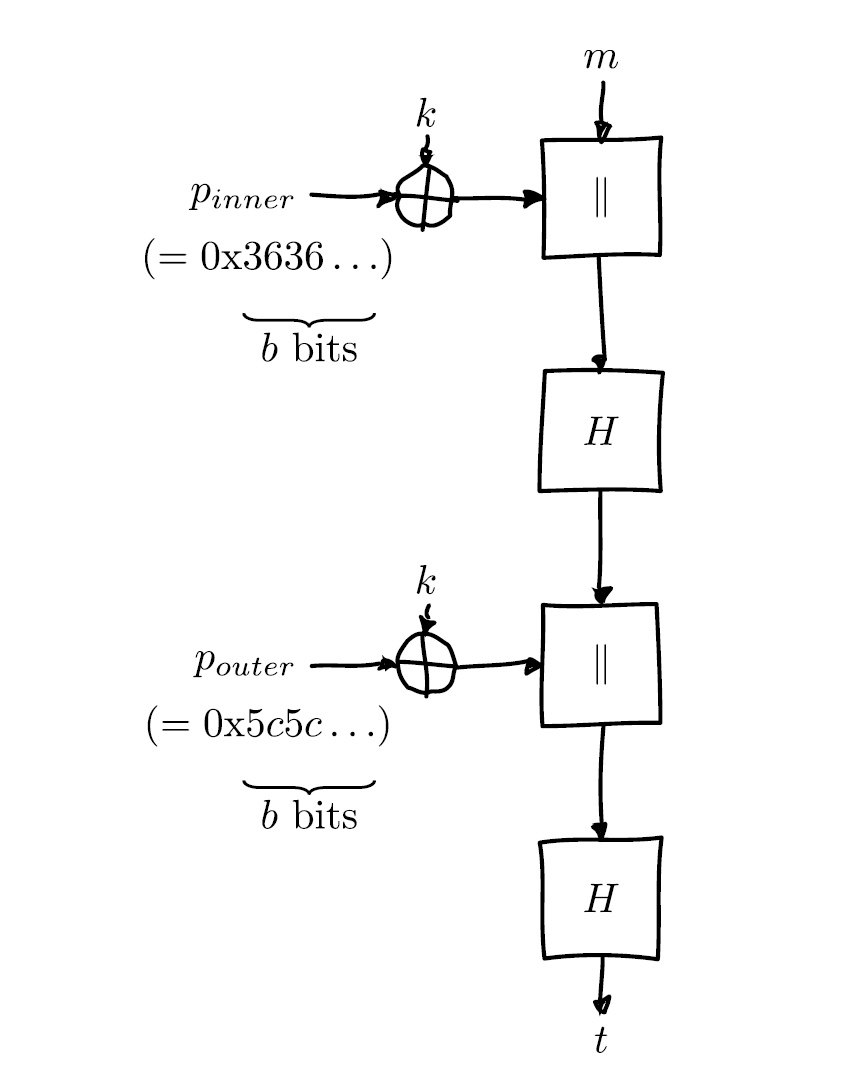

### 11.5 One-time MACs

